# 환경문제에 대한 인식 분석

## 분석 목표
* 환경문제에 대한 시민들의 인식을 분석하여 어떻게 느끼고 있는지 파악

## 목차
1. 데이터 읽기
    * 데이터 불러오기
2. 데이터 정제
    * 결측치 확인
    * 결측치 제거
3. 데이터 시각화

### 데이터 출처
* https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1SSEN053R&vw_cd=MT_ZTITLE&list_id=101_D219&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE
* https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1SSEN054R&vw_cd=MT_ZTITLE&list_id=101_D219&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE
* https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1SSEN057R&vw_cd=MT_ZTITLE&list_id=101_D219&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE
* https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1SSEN058R&vw_cd=MT_ZTITLE&list_id=101_D219&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE
* https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1SSEN059R&vw_cd=MT_ZTITLE&list_id=101_D219&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE
* https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1SSEN051R&vw_cd=MT_ZTITLE&list_id=101_D219&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE 
---

### 1. 데이터 읽기

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
!pip install seaborn==0.9.0
import seaborn as sns
print(sns.__version__)
# missingno라는 라이브러리가 설치되어 있을 경우 import

0.9.0


In [40]:
chemical = pd.read_csv('chemical.csv', encoding = 'cp949')
climate = pd.read_csv('climate.csv', encoding = 'cp949')
particulates = pd.read_csv('particulates.csv', encoding = 'cp949')
pesticide = pd.read_csv('pesticide.csv', encoding = 'cp949')
radioactivity = pd.read_csv('radioactivity.csv', encoding = 'cp949')
tap_water = pd.read_csv('tap water.csv', encoding = 'cp949')

In [41]:
chemical.head()

,행정구역(시도)별(1),특성별(1),특성별(2),2020,2020.1,2020.2,2020.3,2020.4,2020.5
0,행정구역(시도)별(1),특성별(1),특성별(2),계,전혀 불안하지 않음,별로 불안하지 않음,보통,약간 불안함,매우 불안함
1,전국,전체,계,100.0,3.5,16.0,34.5,36.7,9.4
2,전국,동·읍면부,동부,100.0,3.1,15.0,34.2,37.7,10.0
3,전국,동·읍면부,읍면부,100.0,5.3,20.8,35.6,31.9,6.4
4,전국,성별,남자,100.0,4.2,17.2,36.5,34.6,7.5


* 첫번째 행이 원하는 결과 분류이므로 첫번째 행을 columns로 설정

### 2. 데이터 정제

In [42]:
chemical.columns = chemical.iloc[0].to_list()
chemical = chemical.iloc[1:]

climate.columns = climate.iloc[0].to_list()
climate = climate.iloc[1:]

particulates.columns = particulates.iloc[0].to_list()
particulates = particulates.iloc[1:]

pesticide.columns = pesticide.iloc[0].to_list()
pesticide = pesticide.iloc[1:]

radioactivity.columns = radioactivity.iloc[0].to_list()
radioactivity = radioactivity.iloc[1:]

tap_water.columns = tap_water.iloc[0].to_list()
tap_water = tap_water.iloc[1:]

In [43]:
climate[climate['별로 불안하지 않음'] == '-']

,행정구역(시도)별(1),특성별(1),특성별(2),계,전혀 불안하지 않음,별로 불안하지 않음,보통,약간 불안함,매우 불안함
9,전국,연령,15∼19세,-,-,-,-,-,-
48,전국,연령*성별,15~19세*남자,-,-,-,-,-,-
49,전국,연령*성별,15~19세*여자,-,-,-,-,-,-


* 모든 데이터의 결측치를 확인한 결과 climate 데이터에 결측치가 존재하므로 결측치 제거

In [44]:
climate = climate.drop(climate[climate['별로 불안하지 않음'] == '-'].index)

* 평균을 구하기 위해 데이터타입을 float으로 변경

In [45]:
chemical = chemical.astype({'전혀 불안하지 않음': 'float',
                           '별로 불안하지 않음': 'float',
                           '보통': 'float',
                           '약간 불안함': 'float',
                           '매우 불안함': 'float'})

climate = climate.astype({'전혀 불안하지 않음': 'float',
                           '별로 불안하지 않음': 'float',
                           '보통': 'float',
                           '약간 불안함': 'float',
                           '매우 불안함': 'float'})

particulates = particulates.astype({'전혀 불안하지 않음': 'float',
                           '별로 불안하지 않음': 'float',
                           '보통': 'float',
                           '약간 불안함': 'float',
                           '매우 불안함': 'float'})

pesticide = pesticide.astype({'전혀 불안하지 않음': 'float',
                           '별로 불안하지 않음': 'float',
                           '보통': 'float',
                           '약간 불안함': 'float',
                           '매우 불안함': 'float'})

radioactivity = radioactivity.astype({'전혀 불안하지 않음': 'float',
                           '별로 불안하지 않음': 'float',
                           '보통': 'float',
                           '약간 불안함': 'float',
                           '매우 불안함': 'float'})

tap_water = tap_water.astype({'전혀 불안하지 않음': 'float',
                           '별로 불안하지 않음': 'float',
                           '보통': 'float',
                           '약간 불안함': 'float',
                           '매우 불안함': 'float'})

* 분류에 따른 데이터 결과를 합산한 평균을 구함

In [46]:
result_x = tap_water.mean().index
result_y = (chemical.mean().values + climate.mean().values + particulates.mean().values + pesticide.mean().values + radioactivity.mean().values + tap_water.mean().values) / 6

### 3. 데이터 시각화

In [47]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False})

* 5개 항목에 대한 결과 시각화

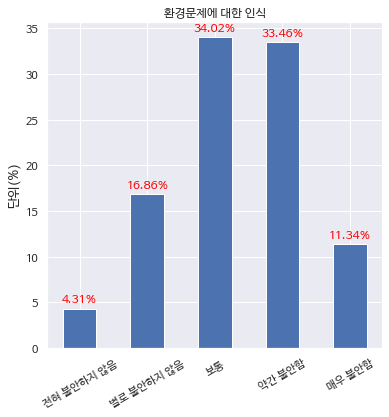

In [48]:
plt.figure(figsize = (6, 6))
plt.bar(result_x, result_y, width = 0.5)
plt.title('환경문제에 대한 인식')
plt.ylabel('단위(%)', fontsize = 13)
plt.xticks(rotation = 30)
for i, v in enumerate(result_x):
    plt.text(v, result_y[i] + 0.3, f'{round(result_y[i], 2)}%',
             fontsize = 12,
             color='red',
             horizontalalignment='center',  
             verticalalignment='bottom')
plt.show()

* 불안함 = 보통 + 약간 불안함 + 매우 불안함
* 불안하지 않음 = 전혀 불안하지 않음 + 별로 불안하지 않음
* 위의 식으로 합산한 데이터 시각화

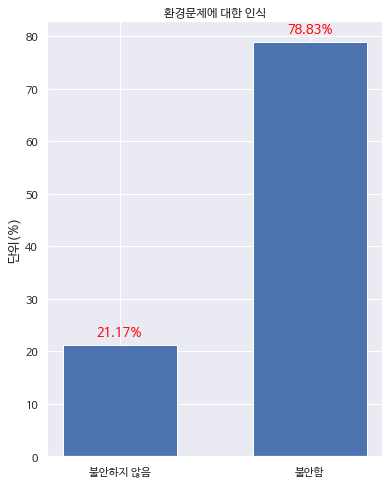

In [49]:
result_sum_x = ['불안하지 않음', '불안함']
result_sum_y = [sum(result_y[:2]), sum(result_y[2:])]

plt.figure(figsize = (6, 8))
plt.bar(result_sum_x, result_sum_y, width = 0.6)
plt.title('환경문제에 대한 인식')
plt.ylabel('단위(%)', fontsize = 13)
for i, v in enumerate(result_sum_x):
    plt.text(v, result_sum_y[i] + 1, f'{round(result_sum_y[i], 2)}%',
             fontsize = 13,
             color='red',
             horizontalalignment='center',  
             verticalalignment='bottom')
plt.show()

* 보통을 불안함에 포함하여 분석할 경우

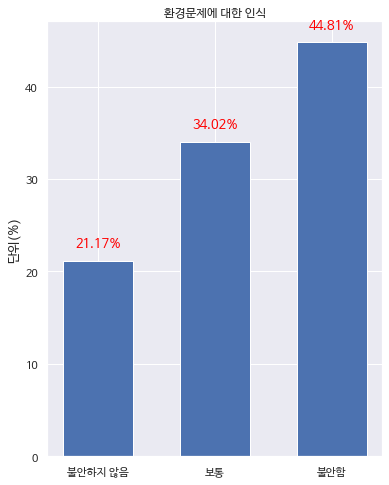

In [50]:
result_sum_x = ['불안하지 않음', '보통', '불안함']
result_sum_y = [sum(result_y[:2]), result_y[2], sum(result_y[3:])]

plt.figure(figsize = (6, 8))
plt.bar(result_sum_x, result_sum_y, width = 0.6)
plt.title('환경문제에 대한 인식')
plt.ylabel('단위(%)', fontsize = 13)
for i, v in enumerate(result_sum_x):
    plt.text(v, result_sum_y[i] + 1, f'{round(result_sum_y[i], 2)}%',
             fontsize = 13,
             color='red',
             horizontalalignment='center',  
             verticalalignment='bottom')
plt.show()

* 보통을 따로 분류했을 경우